### Basic Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from windrose import WindroseAxes

In [2]:
RAW_DATA = "../data/sierraleone-bumbuna.csv"
CLEANED_DATA = "../data/sierraleone-bumbuna_cleaned.csv"
data = pd.read_csv(RAW_DATA)
data.shape

(525600, 19)

## Summary Statistics & Missing-Value Report

In [3]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [4]:
missing_count= data.isna().sum()
missing_count

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
missing_percent = (missing_count/len(data))*100
missing_data = missing_percent[missing_percent>5]
print(f"Columns with missing Value > 5%: {missing_data}")

Columns with missing Value > 5%: Comments    100.0
dtype: float64


## Outlier Detection & Basic Cleaning

In [6]:
clean_data = data.drop(['Comments'], axis=1)
clean_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

In [ ]:
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb']
z_score = np.abs(zscore(clean_data[key_columns]))
outlier_flag = (z_score >3).any(axis=1)
clean_data['Outlier_flag'] = outlier_flag
outliers = clean_data[clean_data['Outlier_flag']]
outliers.head

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Outlier_flag
653,2021-10-30 10:54,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,True
654,2021-10-30 10:55,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,True
655,2021-10-30 10:56,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,True
656,2021-10-30 10:57,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,True
657,2021-10-30 10:58,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519235,2022-10-25 13:56,884.0,808.0,170.5,911.0,892.0,34.7,57.8,3.0,3.9,0.5,29.7,11.8,997,0,0.0,63.2,59.3,True
519236,2022-10-25 13:57,881.0,804.0,172.1,907.0,889.0,34.5,57.9,3.0,4.1,0.8,37.4,26.3,997,0,0.0,63.1,59.1,True
519237,2022-10-25 13:58,878.0,801.0,173.4,903.0,885.0,34.5,58.1,3.0,3.6,0.6,31.9,14.3,997,0,0.0,63.0,59.0,True
519238,2022-10-25 13:59,873.0,795.9,174.4,899.0,880.0,34.5,51.8,2.7,3.4,0.5,36.5,11.2,997,0,0.0,62.8,58.8,True


In [13]:
for col in key_columns:
    median_col = clean_data[col].median()
    clean_data.loc[clean_data['Outlier_flag'], col] = median_col
clean_data[clean_data['Outlier_flag']]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Outlier_flag
653,2021-10-30 10:54,0.3,-0.1,-0.1,878.0,856.0,25.3,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,True
654,2021-10-30 10:55,0.3,-0.1,-0.1,883.0,861.0,25.3,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,True
655,2021-10-30 10:56,0.3,-0.1,-0.1,912.0,890.0,25.3,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,True
656,2021-10-30 10:57,0.3,-0.1,-0.1,878.0,856.0,25.3,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,True
657,2021-10-30 10:58,0.3,-0.1,-0.1,864.0,843.0,25.3,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519235,2022-10-25 13:56,0.3,-0.1,-0.1,911.0,892.0,25.3,57.8,3.0,3.9,0.5,29.7,11.8,997,0,0.0,63.2,59.3,True
519236,2022-10-25 13:57,0.3,-0.1,-0.1,907.0,889.0,25.3,57.9,3.0,4.1,0.8,37.4,26.3,997,0,0.0,63.1,59.1,True
519237,2022-10-25 13:58,0.3,-0.1,-0.1,903.0,885.0,25.3,58.1,3.0,3.6,0.6,31.9,14.3,997,0,0.0,63.0,59.0,True
519238,2022-10-25 13:59,0.3,-0.1,-0.1,899.0,880.0,25.3,51.8,2.7,3.4,0.5,36.5,11.2,997,0,0.0,62.8,58.8,True


### Cleaned Data Saving

In [14]:
clean_data.to_csv(CLEANED_DATA, index=False)
print(f'Data saved to {CLEANED_DATA}')

Data saved to ../data/sierraleone-bumbuna_cleaned.csv


### Time Series Analysis

c:\Users\PC\Documents\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


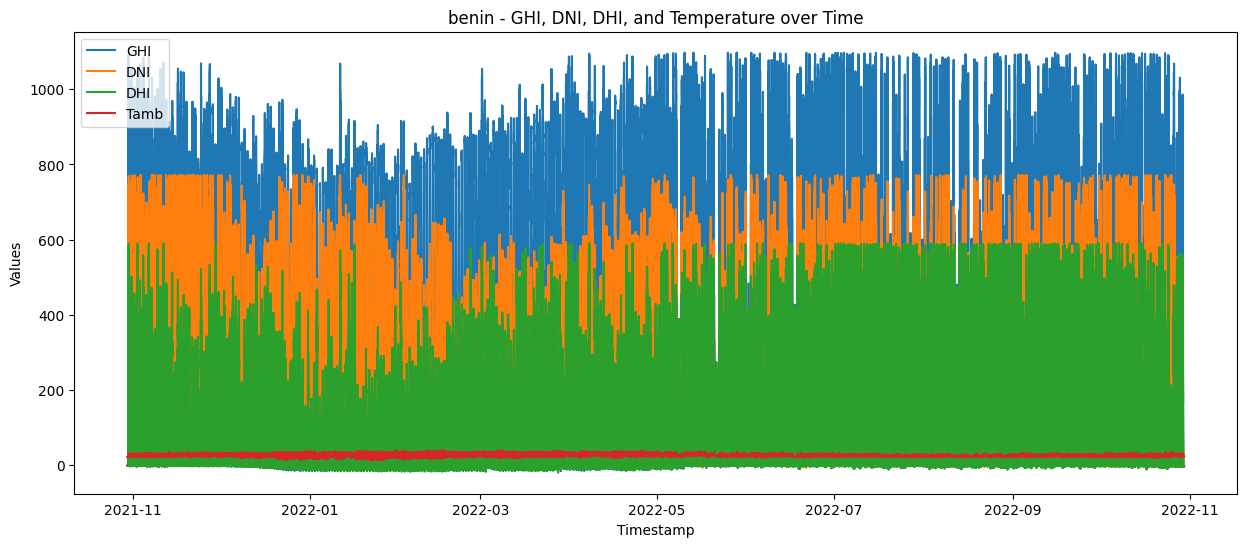

In [15]:
clean_data['Timestamp'] = pd.to_datetime(clean_data['Timestamp'])
clean_data = clean_data.sort_values(['Timestamp'])
plt.figure(figsize=(15, 6))
sns.lineplot(x='Timestamp', y='GHI', data=clean_data, label='GHI')
sns.lineplot(x='Timestamp', y='DNI', data=clean_data, label='DNI')
sns.lineplot(x='Timestamp', y='DHI', data=clean_data, label='DHI')
sns.lineplot(x='Timestamp', y='Tamb', data=clean_data, label='Tamb')
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.title("benin - GHI, DNI, DHI, and Temperature over Time")
plt.show()


### Observation Patterns by month

In [16]:
clean_data['Month'] = clean_data['Timestamp'].dt.month
monthly_ave = clean_data.groupby(['Month'])[key_columns].mean()
monthly_ave

,GHI,DNI,DHI,Tamb
Month,,,,
1,194.054364,166.317608,77.594169,25.350623
2,219.421225,146.961463,107.689812,27.181964
3,230.829064,129.204263,126.692072,28.355493
4,234.267192,143.633410,115.820903,28.727197
5,194.621752,94.102444,119.592249,27.227193
6,175.965801,81.665970,113.161007,25.839458
7,143.675654,40.914760,114.224496,25.040755
8,125.214671,25.412876,106.707469,24.634290
9,145.617440,49.169426,110.669190,25.198546


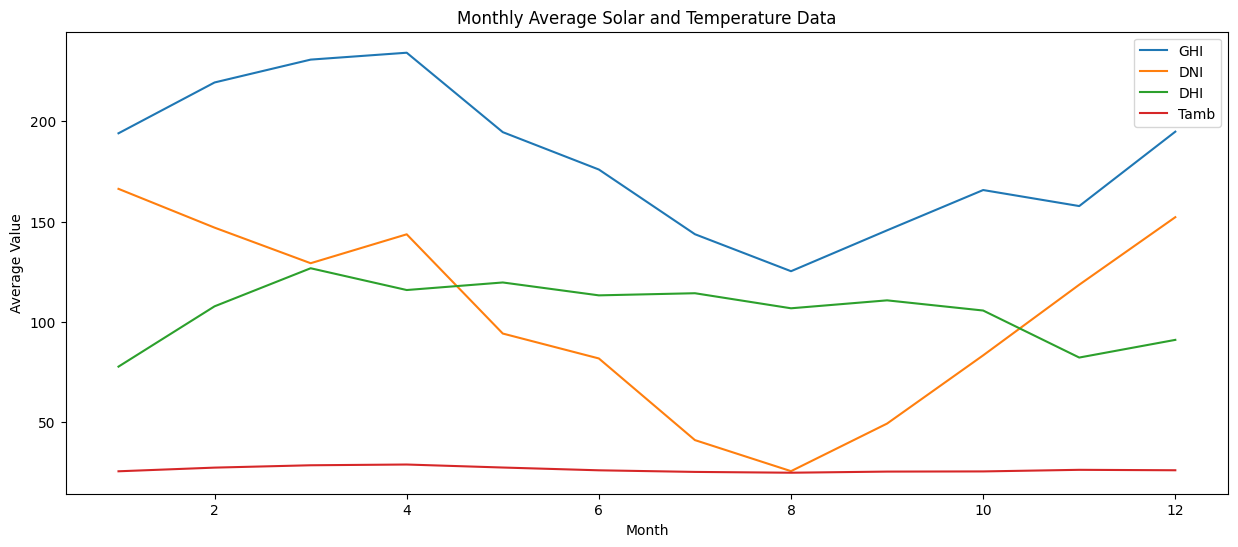

In [17]:
monthly_ave.plot(kind='line', figsize=(15, 6))
plt.title("Monthly Average Solar and Temperature Data")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.show()

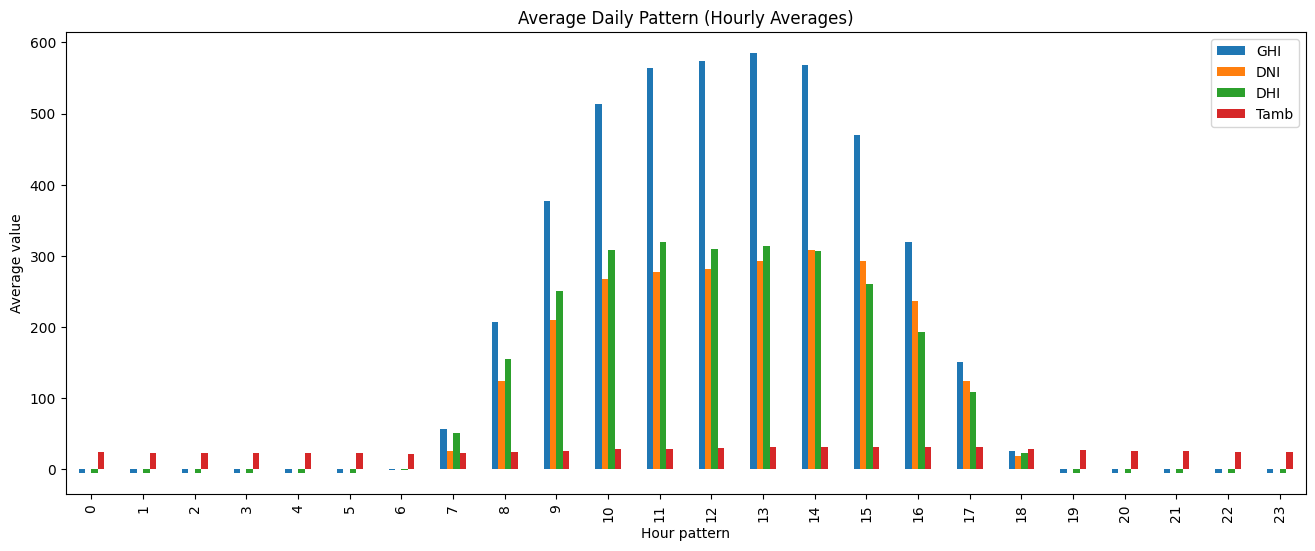

In [18]:
clean_data['Hour'] = clean_data['Timestamp'].dt.hour
hourly_ave = clean_data.groupby(['Hour'])[key_columns].mean()
hourly_ave.plot(kind='bar', figsize=(16, 6))
plt.title("Average Daily Pattern (Hourly Averages)")
plt.xlabel("Hour pattern")
plt.ylabel("Average value")
plt.show()

### Cleaning Impact

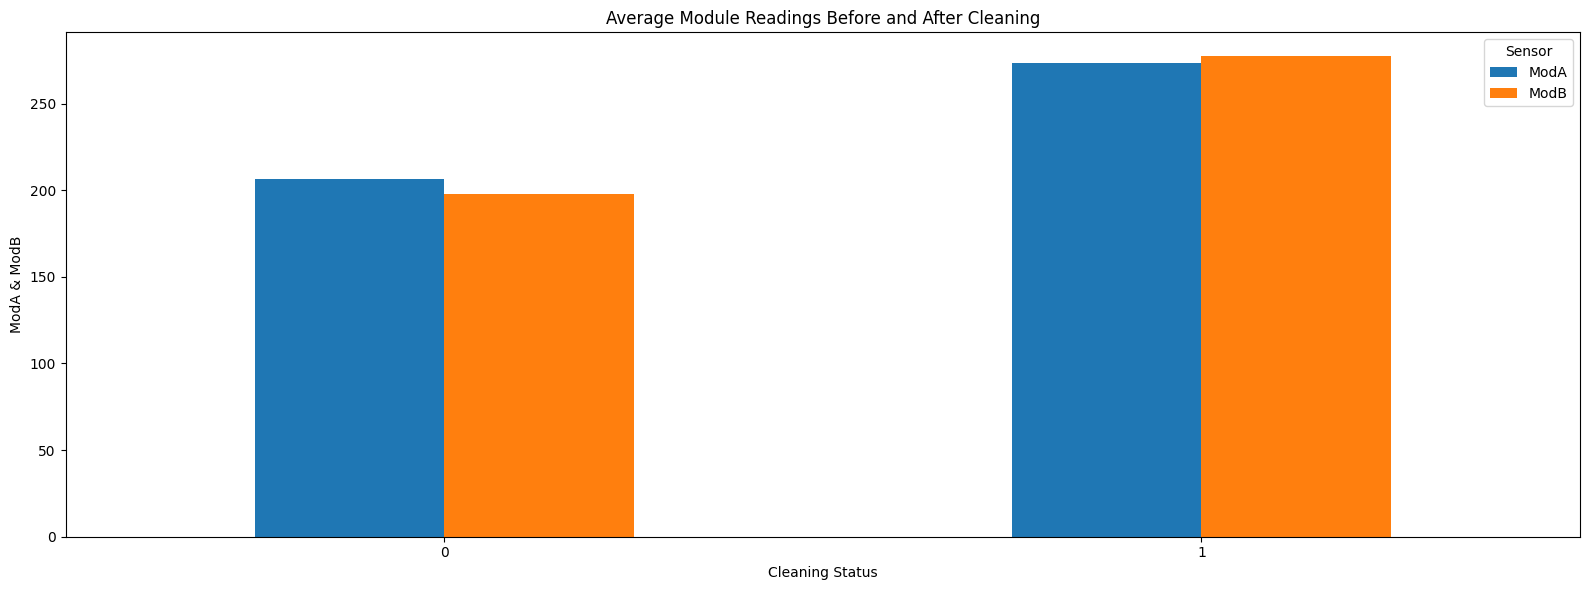

In [19]:
cleaninf_flag = clean_data.groupby(['Cleaning'])[['ModA', 'ModB']].mean()
cleaninf_flag.plot(kind='bar', figsize=(16, 6))
plt.title("Average Module Readings Before and After Cleaning")
plt.xlabel("Cleaning Status")
plt.ylabel("ModA & ModB")
plt.legend(title="Sensor")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation & relationship Analysis

In [20]:
interest_colu = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_of_interest = clean_data[interest_colu].corr()
mask = np.zeros_like(corr_of_interest)
upper_tri = np.triu_indices_from(mask)
mask[upper_tri] = True

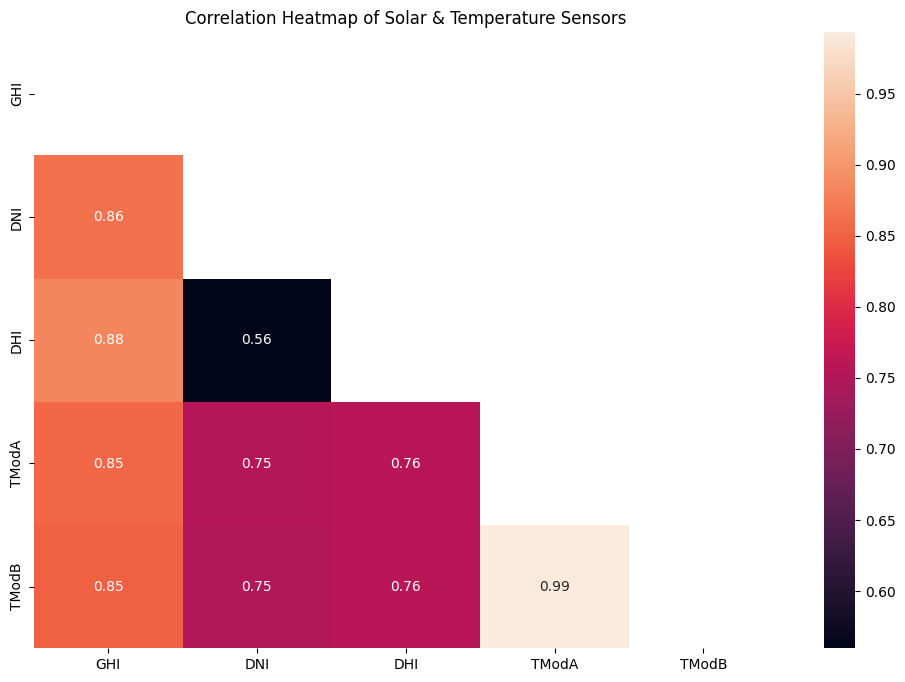

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_of_interest, mask=mask, annot=True)
plt.title("Correlation Heatmap of Solar & Temperature Sensors")
plt.show()

### Scatter Plot
#### wind vs. GHI

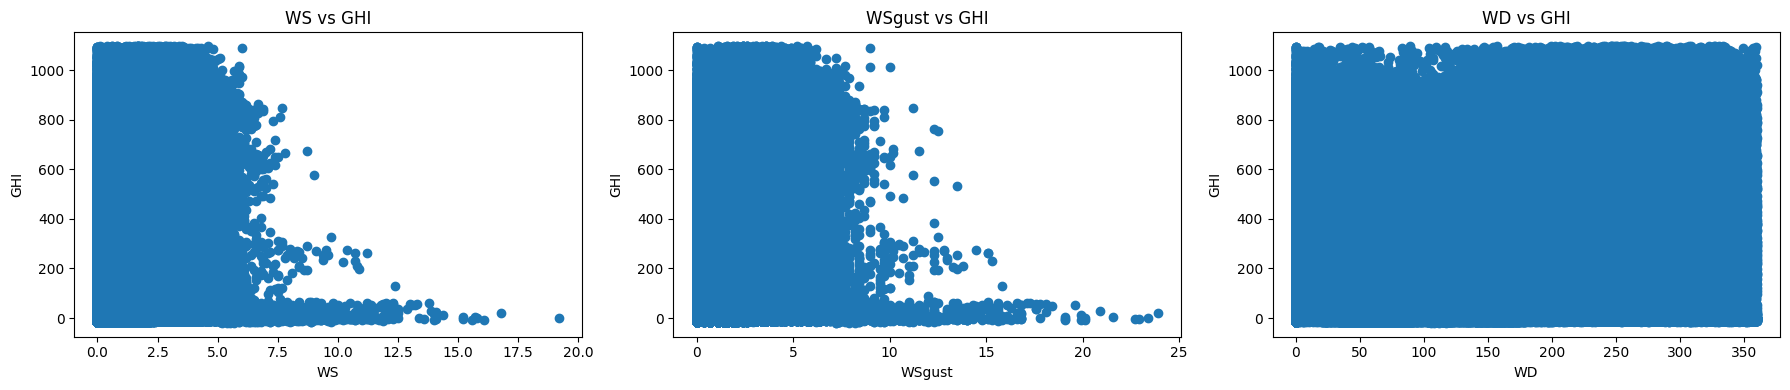

In [22]:
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
plt.scatter(clean_data['WS'], clean_data['GHI'])
plt.title("WS vs GHI")
plt.xlabel('WS')
plt.ylabel('GHI')

plt.subplot(1,3,2)
plt.scatter(clean_data['WSgust'], clean_data['GHI'])
plt.title("WSgust vs GHI")
plt.xlabel('WSgust')
plt.ylabel('GHI')

plt.subplot(1,3,3)
plt.scatter(clean_data['WD'], clean_data['GHI'])
plt.title("WD vs GHI")
plt.xlabel('WD')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

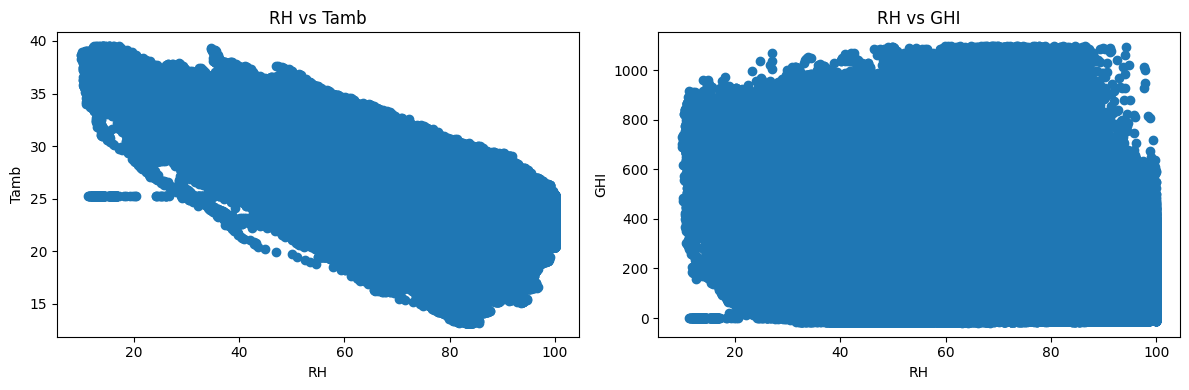

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(clean_data['RH'], clean_data['Tamb'])
plt.title("RH vs Tamb")
plt.xlabel('RH')
plt.ylabel('Tamb')

plt.subplot(1,2,2)
plt.scatter(clean_data['RH'], clean_data['GHI'])
plt.title("RH vs GHI")
plt.xlabel('RH')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

### Wind & Distrbution Analysis

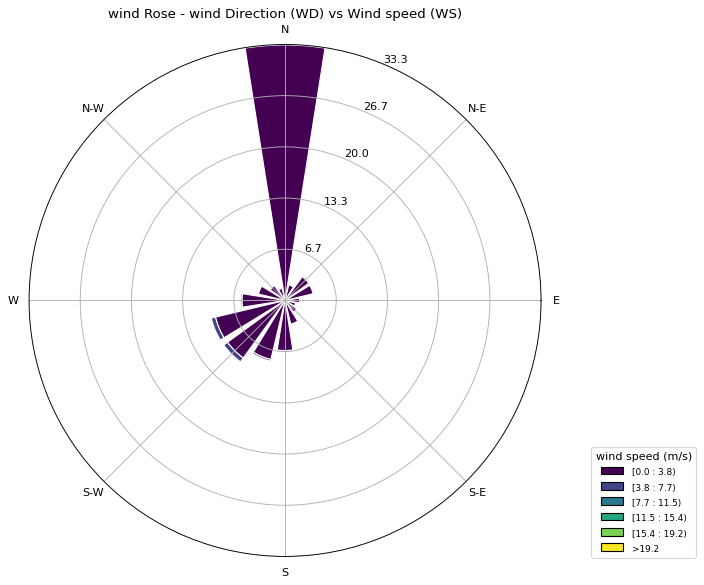

In [24]:
ax = WindroseAxes.from_ax()
ax.bar(clean_data['WD'], clean_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='wind speed (m/s)', bbox_to_anchor=(1.1,0))
plt.title("wind Rose - wind Direction (WD) vs Wind speed (WS)")
plt.show()

### Distribution Analysis (Histograms)

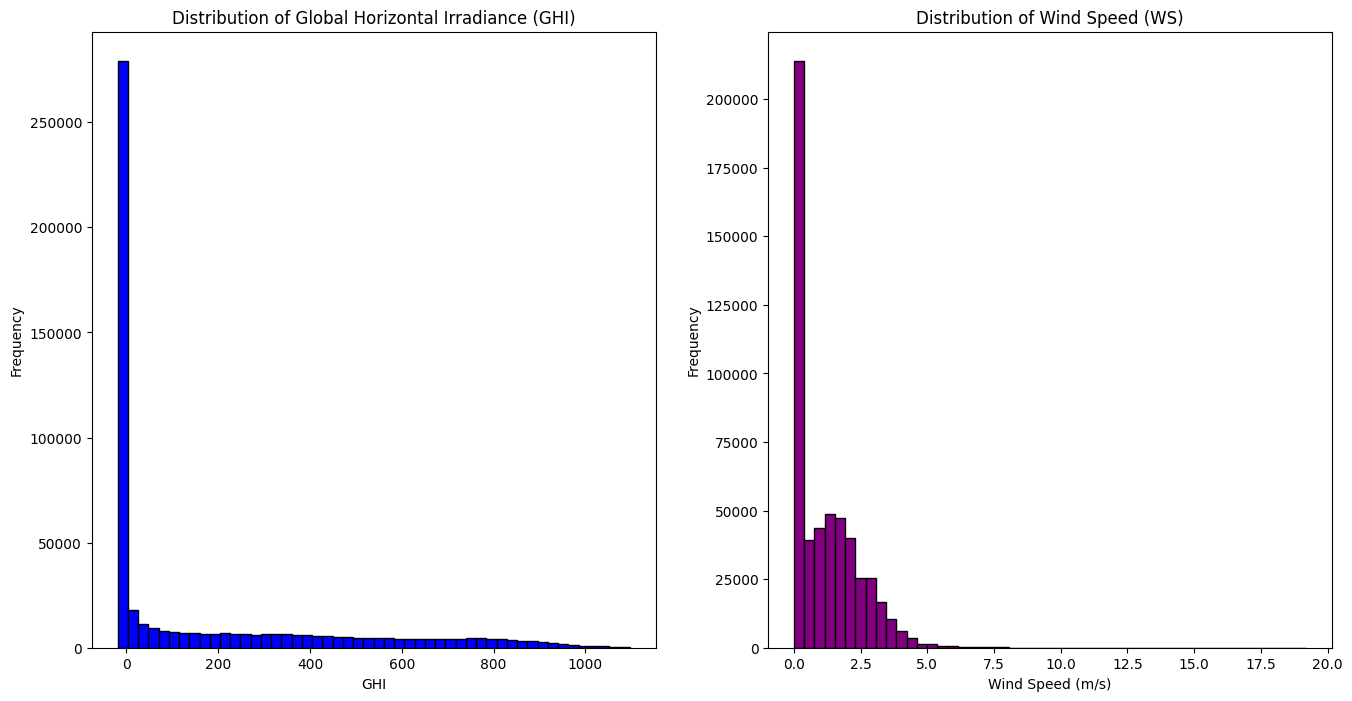

In [27]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.hist(clean_data['GHI'], bins=50, color='blue', ec='black')
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.hist(clean_data['WS'], bins=50, color='purple', ec='black')
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

### Temperature Analysis

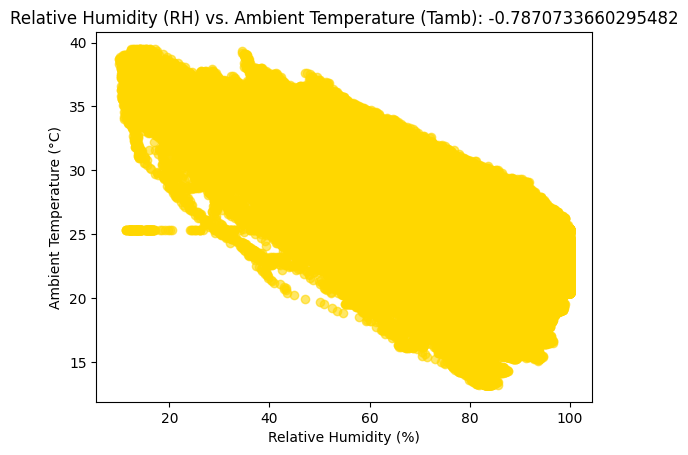

In [28]:
corr_RH_temb = clean_data['RH'].corr(clean_data['Tamb'])
plt.scatter(clean_data['RH'], clean_data['Tamb'], alpha=0.6, c='gold')
plt.title(f"Relative Humidity (RH) vs. Ambient Temperature (Tamb): {corr_RH_temb}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.show()

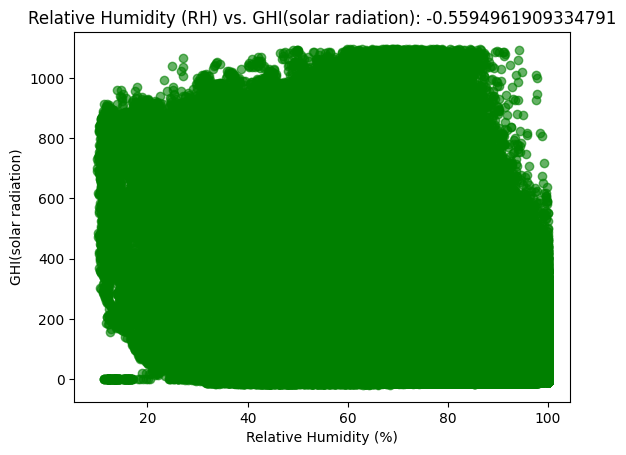

In [29]:
corr_RH_GHI = clean_data['RH'].corr(clean_data['GHI'])
plt.scatter(clean_data['RH'], clean_data['GHI'], alpha=0.6, c='green')
plt.title(f"Relative Humidity (RH) vs. GHI(solar radiation): {corr_RH_GHI}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI(solar radiation)")
plt.show()

### Bubble chart

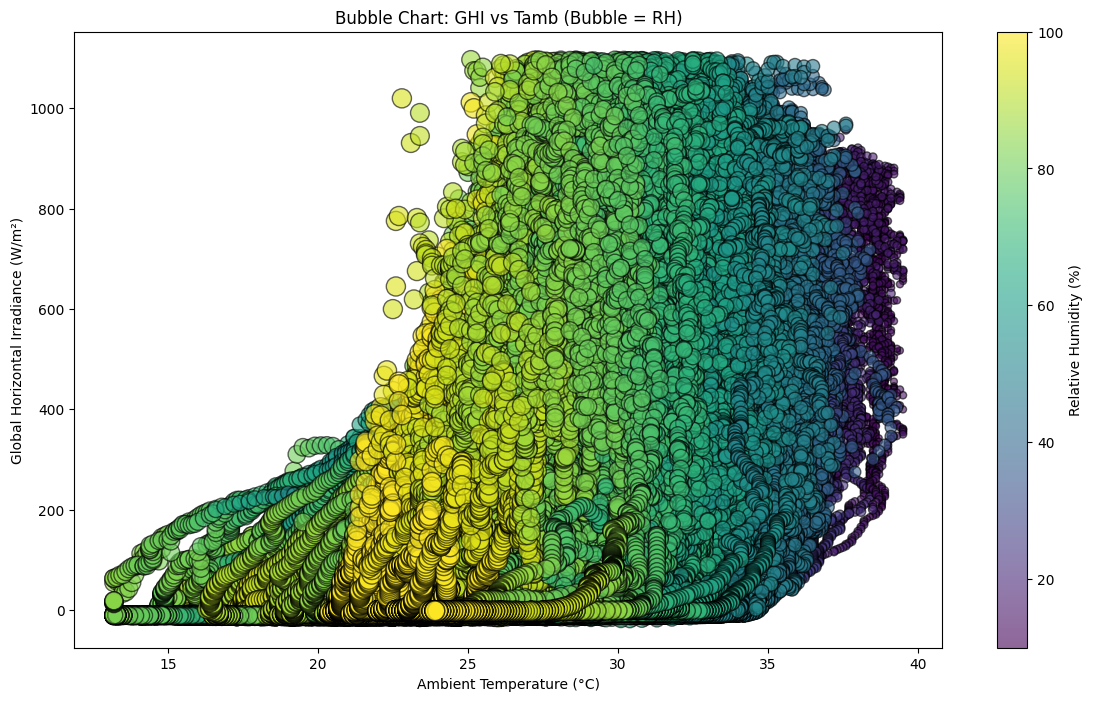

In [32]:
plt.figure(figsize=(14, 8))
plt.scatter(clean_data['Tamb'],clean_data['GHI'], s=clean_data['RH']*2, alpha=0.6, edgecolors='black', c=clean_data['RH'])
plt.title("Bubble Chart: GHI vs Tamb (Bubble = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
cbar = plt.colorbar()
cbar.set_label("Relative Humidity (%)")

plt.show()